In [10]:
# Import packages
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, Column, hstack
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits

import os, sys
sys.path.append('/home/jiaxuanl/Research/SALAD/script/')
import kuaizi
from kuaizi.display import display_single
kuaizi.set_env(project='SBF', name='Rosesim', data_dir='/scratch/gpfs/JENNYG/jiaxuanl/Data')

import asdf
from astropy.time import Time
from astropy import units as u
import roman_datamodels as rdm
from romanisim import ris_make_utils as ris

import os
os.environ['NUMEXPR_MAX_THREADS'] = "30"
import artpop
sys.path.append('/home/jiaxuanl/Research/SBF/src/SBF')
import rosesim
from rosesim import RomanGalaxy, RomanSky, rng

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Now we already have a sky. How to include the sky into RomanGal??

In [3]:
obs_ra = 150.1049 #270.95
obs_dec = 2.2741 # -0.2

In [4]:
import warnings
from copy import deepcopy
import astrocut
from astrocut import get_center_pixel, ASDFCutout
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.nddata import Cutout2D

from display import show_image_wcs

In [7]:
prefix = "dw_1e4_5Mpc_1.0Gyr"

In [8]:
asdf_cutout = ASDFCutout(f"./{prefix}/F158_10272s.asdf", 
                         SkyCoord(obs_ra, obs_dec, unit='deg'), 
                         500)

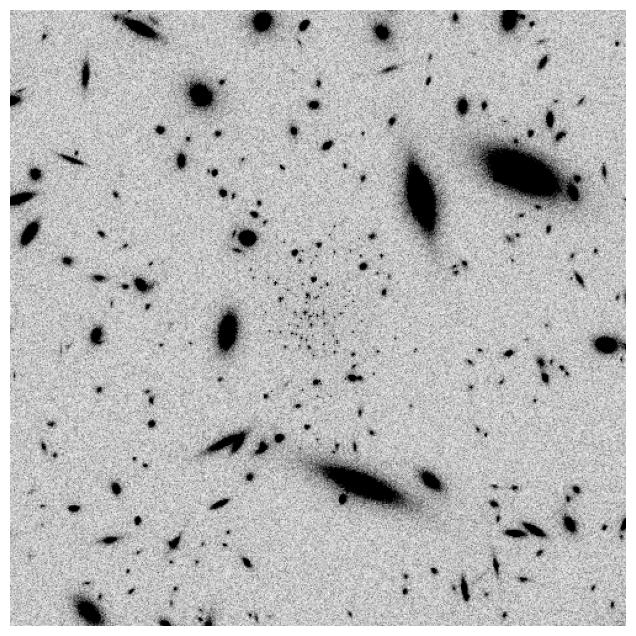

In [11]:
img = asdf_cutout.cutouts[0].data 
display_single(img - np.median(img), cmap='Greys', scale_bar=False);

In [17]:
from display import show_image_wcs

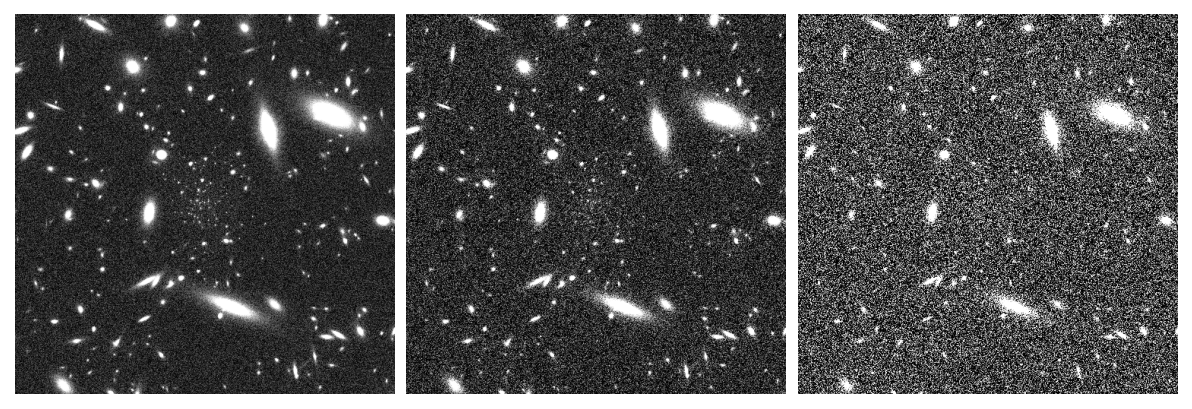

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5), dpi=150)

prefix = 'dw_1e4.0_5Mpc_1.0Gyr'
exptime = 10272
asdf_cutout = ASDFCutout(f"/scratch/gpfs/JENNYG/jiaxuanl/Data/SBF/Rosesim/{prefix}/{filt}_{exptime}s.asdf", 
                         SkyCoord(obs_ra, obs_dec, unit='deg'), 500)
img = asdf_cutout.cutouts[0].data
img -= np.median(img)
_, _, scale = show_image_wcs(img, fig=fig, ax=axes[0], percl=4, percu=98, cmap='Greys_r')


exptime = 2568
asdf_cutout = ASDFCutout(f"/scratch/gpfs/JENNYG/jiaxuanl/Data/SBF/Rosesim/{prefix}/{filt}_{exptime}s.asdf", 
                         SkyCoord(obs_ra, obs_dec, unit='deg'), 500)
img = asdf_cutout.cutouts[0].data
img -= np.median(img)
_, _, scale = show_image_wcs(img, fig=fig, ax=axes[1], scale_args=scale, cmap='Greys_r')


exptime = 642
asdf_cutout = ASDFCutout(f"/scratch/gpfs/JENNYG/jiaxuanl/Data/SBF/Rosesim/{prefix}/{filt}_{exptime}s.asdf", 
                         SkyCoord(obs_ra, obs_dec, unit='deg'), 500)
img = asdf_cutout.cutouts[0].data
img -= np.median(img)
_, _, scale = show_image_wcs(img, fig=fig, ax=axes[2], scale_args=scale, cmap='Greys_r')


for ax in axes:
    ax.axis('off')

plt.subplots_adjust(wspace=0.03)

In [36]:
0.4 * 3600 / 206265 * 5000

34.9065522507454

# Visualize

In [12]:
from astropy.visualization import make_lupton_rgb

In [13]:
zp = -2.5 * np.log10(1 * ((0.11 * u.arcsec)**2).to(u.steradian).value * 1e6 / 3631)

In [14]:
prefix = 'ufd_1e6_25Mpc_1.0Gyr'
prefix = 'dw_1e5.5_20Mpc_1.0Gyr'
prefix = 'dw_1e4_5Mpc_1.0Gyr'

In [15]:
filters = ['F106', 'F129', 'F158']
imgs = []
exptime = 10272 #642 # 10272
for filt in filters:
    asdf_cutout = ASDFCutout(f"/scratch/gpfs/JENNYG/jiaxuanl/Data/SBF/Rosesim/{prefix}/{filt}_{exptime}s.asdf", 
                             SkyCoord(obs_ra, obs_dec, unit='deg'), 1500)

    hdu = asdf_cutout.fits_cutouts[0]
    hdu.writeto(f'/scratch/gpfs/JENNYG/jiaxuanl/Data/SBF/Rosesim/{prefix}/{filt}_{exptime}s_cutout.fits', overwrite=True)

    img = asdf_cutout.cutouts[0].data
    img -= np.median(img)
    img *= 10**(0.4 * (27 - zp))
    # imgs.append(img[250:1250, :])
    imgs.append(img[:, :])

(-0.5, 1499.5, 1499.5, -0.5)

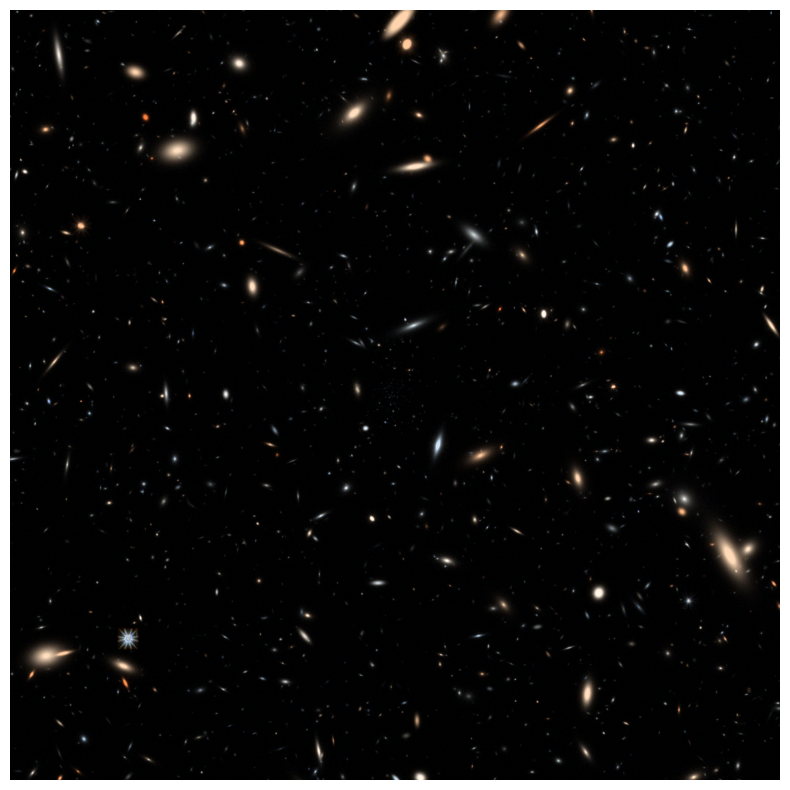

In [16]:
rgb = make_lupton_rgb(0.9 * imgs[2], 1.05 * imgs[1], 1.2 * imgs[0], minimum=0, stretch=1, Q=3)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(rgb)
plt.axis('off')

# plt.text(wid - 0.2 * wid, +5, filters[filt_idx[0]], 
         # fontsize=20, color='deepskyblue', va='center', ha='center')
# plt.text(wid, +5, filters[filt_idx[1]], 
         # fontsize=20, color='limegreen', va='center', ha='center')
# plt.text(wid + 0.2 * wid, +5, filters[filt_idx[2]], 
         # fontsize=20, color='orangered', va='center', ha='center')
# title = prefix
# plt.title(title, fontsize=20)

# plt.savefig(f'/tigress/jiaxuanl/public_html/figure/SBF/Rosesim/{prefix}.png', bbox_inches='tight', dpi=200, transparent=True)

----